This takes the some available categorical features in the original wildfire dataset (fire start month and state) for some visualizations.

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from matplotlib.pyplot import text
import calendar


In [21]:
X = pd.read_pickle('wildfire_encoded_data.pkl')
y = pd.read_pickle('wildfire_encoded_labels.pkl')
#Grab more features from the final dataset.
X_1 = pd.read_pickle('final_data_without_outliers.pkl')

In [22]:
X_1.head()

,FIRE_SIZE_CLASS,STAT_CAUSE_CODE,LONGITUDE,LATITUDE,DISCOVERY_TIME,CONT_TIME,FIRE_YEAR,STATE_CODE,HOURS_TO_CONT
0,1,9.0,-121.005833,40.036944,1300,1730,2005,0,4
1,1,1.0,-120.404444,38.933056,845,1530,2004,0,7
2,1,5.0,-120.735556,38.984167,1921,2024,2004,0,1
3,1,1.0,-119.913333,38.559167,1600,1400,2004,0,118
4,1,1.0,-119.933056,38.559167,1600,1200,2004,0,116


In [23]:
y_1 = X_1['HOURS_TO_CONT']
X_1 = X_1.drop(columns=['HOURS_TO_CONT'])

In [24]:
X_1.head()

,FIRE_SIZE_CLASS,STAT_CAUSE_CODE,LONGITUDE,LATITUDE,DISCOVERY_TIME,CONT_TIME,FIRE_YEAR,STATE_CODE
0,1,9.0,-121.005833,40.036944,1300,1730,2005,0
1,1,1.0,-120.404444,38.933056,845,1530,2004,0
2,1,5.0,-120.735556,38.984167,1921,2024,2004,0
3,1,1.0,-119.913333,38.559167,1600,1400,2004,0
4,1,1.0,-119.933056,38.559167,1600,1200,2004,0


In [5]:
y.head()

0     22.00
1     22.25
2     21.45
3    132.00
4    128.00
Name: TIME_TO_CONT, dtype: float64

Now let's take a very basic, visual look at the distribution.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 20);

In [25]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size = .2, random_state = 20);


In [26]:
y1_train

150737      2
472884      0
56259      77
623123      1
653476      0
165721     62
392124      1
455056      2
172373      2
556353      0
633046     22
387868      2
575493      0
5524        3
736527      1
265030      2
348932      1
73555       2
231382     18
779877      3
407668      1
450778      1
768240      0
431062      2
18614       2
84650      51
217432      1
382005      1
33412     814
639733      2
         ... 
217035      0
257677      1
645402     48
170978      0
185599      0
405989      3
422663      3
398480      2
191678      2
686822      1
429798      2
174845      4
427792      1
635859      1
11003      28
91930       0
677333      2
860712      1
60534       0
80864       3
52386       1
460359      3
3915        1
648596     25
702857      1
556250      0
744348     41
285919      1
37135      21
879066      0
Name: HOURS_TO_CONT, Length: 713605, dtype: int64

([<matplotlib.axis.XTick at 0x7ff445b80cc0>,
 <a list of 13 Text xticklabel objects>)

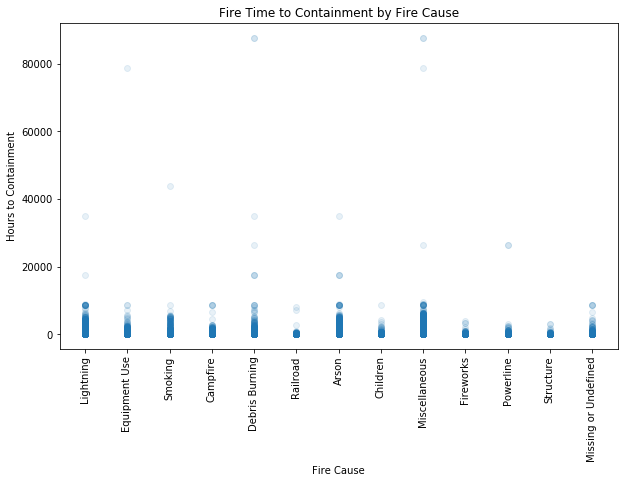

In [9]:
#Cause dict based off of the two columns for cause and cause desc:
#state_cause_dict = {9.0: 'Miscellaneous',
# 1.0: 'Lightning',
# 5.0: 'Debris Burning',
# 4.0: 'Campfire',
# 2.0: 'Equipment Use',
# 7.0: 'Arson',
# 8.0: 'Children',
# 6.0: 'Railroad',
# 3.0: 'Smoking',
# 11.0: 'Powerline',
# 12.0: 'Structure',
# 10.0: 'Fireworks',
# 13.0: 'Missing/Undefined'}
cause_list = ['Lightning', 'Equipment Use', 'Smoking', 'Campfire', 'Debris Burning',
              'Railroad', 'Arson', 'Children', 'Miscellaneous', 'Fireworks', 'Powerline',
             'Structure', 'Missing or Undefined']
plt.figure(figsize=(10,6));
X1_train_feat = np.array(X1_train['STAT_CAUSE_CODE']).reshape(-1,1)
plt.scatter(X1_train_feat, y1_train, alpha = 0.1)
plt.title("Fire Time to Containment by Fire Cause")
plt.xlabel("Fire Cause")
plt.ylabel('Hours to Containment')
plt.xticks(np.arange(1,14), cause_list, rotation=90)


([<matplotlib.axis.XTick at 0x7ff4473396a0>,
 <a list of 12 Text xticklabel objects>)

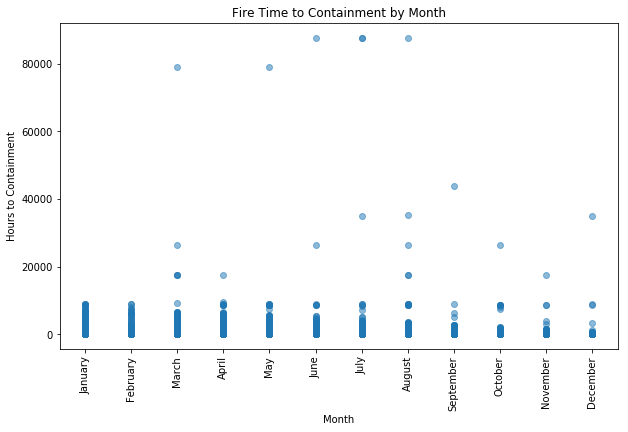

In [10]:
plt.figure(figsize=(10,6));
X_train_feat = np.array(X_train['DISCOVERY_DATETIME']).reshape(-1,1)
plt.scatter(X_train_feat, y_train, alpha = 0.5, label="Training")
plt.title("Fire Time to Containment by Month")
plt.xlabel("Month")
plt.ylabel('Hours to Containment')
plt.xticks(np.arange(1,13), calendar.month_name[1:13], rotation=90)



In [8]:
plt.figure(figsize=(16,8));
X_train_feat = np.array(X_train['STATE']).reshape(-1,1)
X_test_feat = np.array(X_test['STATE']).reshape(-1,1)
plt.scatter(X_train_feat, y_train, alpha=0.5, label="Training")
plt.title("Fire Time to Containment by U.S. State")
plt.xlabel("State")
plt.ylabel('Hours to Containment')
plt.xticks(np.arange(52), ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
        'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])


NameError: name 'rand_jitter' is not defined

<Figure size 1152x576 with 0 Axes>

In [128]:
X = pd.read_pickle('wildfire_area_encoded_data.pkl')
y = pd.read_pickle('wildfire_area_encoded_labels.pkl')

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 20);

In [130]:
X_train.head()

,DISCOVERY_DATETIME,STATE
1247730,7,NaN
236076,7,45.0
1405504,5,NaN
1340393,7,NaN
10099,4,5.0


([<matplotlib.axis.YTick at 0x7fcbb18035f8>,
 <a list of 7 Text yticklabel objects>)

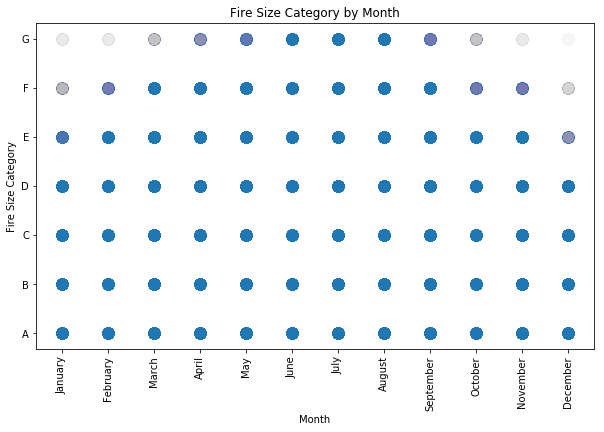

In [131]:
plt.figure(figsize=(10,6));
X_train_feat = np.array(X_train['DISCOVERY_DATETIME']).reshape(-1,1)
plt.scatter(X_train_feat, y_train, s=150, alpha=0.005, label="Training")
plt.title("Fire Size Category by Month")
plt.xlabel("Month")
plt.ylabel('Fire Size Category')
plt.xticks(np.arange(1,13), calendar.month_name[1:13], rotation=90)
plt.yticks(np.arange(1, 8), ['A', 'B', 'C', 'D', 'E', 'F', 'G'])


In [132]:
np.array(y_train)

array([2, 2, 2, ..., 1, 1, 1])

<Figure size 720x720 with 0 Axes>

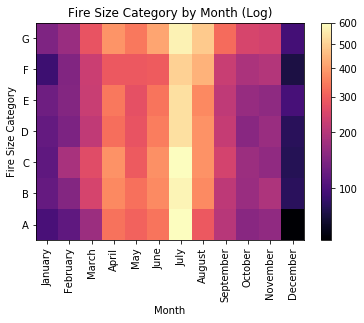

In [82]:
plt.figure(figsize=(10,10));
fig, ax = plt.subplots()
plt.set_cmap('magma')
import matplotlib.colors as mcolors
gamma = 0.5
X_train_feat = np.array(X_train['DISCOVERY_DATETIME']).reshape(-1,1)

h = plt.hist2d(X_train_feat.transpose()[0], np.array(y_train),  norm=mcolors.PowerNorm(gamma), bins=[np.arange(1, 14), np.arange(1,9)])

plt.title("Fire Size Category by Month (Log)")
plt.xlabel("Month")
plt.ylabel('Fire Size Category')
plt.xticks(np.arange(1,13) + .5, calendar.month_name[1:13], rotation=90)
plt.yticks(np.arange(1, 8) + .5, ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
fig.colorbar(h[3], ax=ax)

<Figure size 720x720 with 0 Axes>

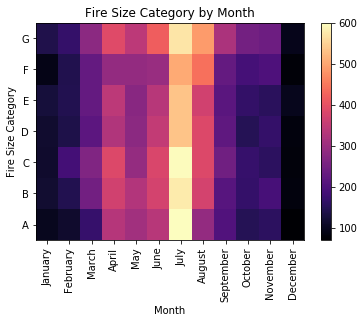

In [85]:
plt.figure(figsize=(10,10));
fig, ax = plt.subplots()
plt.set_cmap('magma')
import matplotlib.colors as mcolors

h = plt.hist2d(X_train_feat.transpose()[0], np.array(y_train), bins=[np.arange(1, 14), np.arange(1,9)])

plt.title("Fire Size Category by Month")
plt.xlabel("Month")
plt.ylabel('Fire Size Category')
plt.xticks(np.arange(1,13) + .5, calendar.month_name[1:13], rotation=90)
plt.yticks(np.arange(1, 8) + .5, ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
fig.colorbar(h[3], ax=ax)

In [ ]:
X_tr

([<matplotlib.axis.XTick at 0x7fcbad97d1d0>,
 <a list of 52 Text xticklabel objects>)

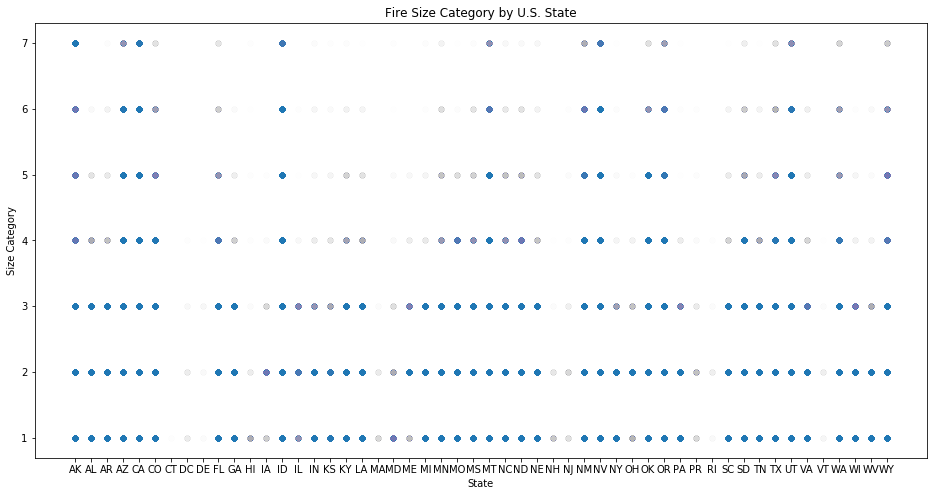

In [68]:
plt.figure(figsize=(16,8));
X_train_feat = np.array(X_train['STATE']).reshape(-1,1)
plt.scatter(X_train_feat, y_train, alpha=0.005, label="Training")
plt.title("Fire Size Category by U.S. State")
plt.xlabel("State")
plt.ylabel('Size Category')
plt.xticks(np.arange(52), ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
        'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [11]:
#We do have to remove nans for this visualization

X_train_feat = np.array(X_train['STATE']).reshape(-1,1)
xp = np.logical_not(np.isnan(X_train_feat))
X_train_feat = X_train_feat[xp]
y_train = np.array(y_train).transpose()


In [12]:
y_train = y_train.reshape(1,-1)

In [13]:
y_train = y_train[xp.transpose()]

In [14]:
len(X_train_feat)

713605

In [15]:
len(y_train)

713605

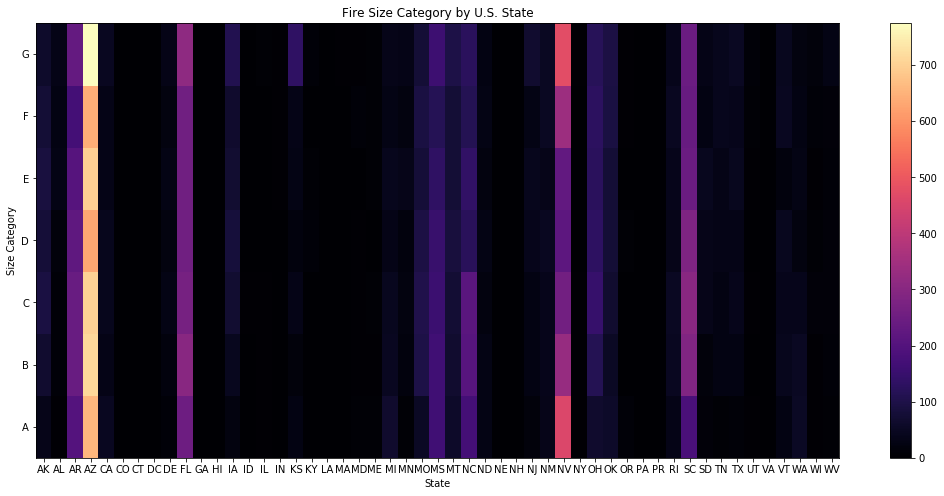

In [88]:
fig, ax = plt.subplots(figsize=(18,8))
X_train_feat = np.array(X_train['STATE']).reshape(-1,1)
xp = np.logical_not(np.isnan(X_train_feat))
X_train_feat = X_train_feat[xp]
y_train = np.array(y_train).transpose()
h = plt.hist2d(X_train_feat, y_train, bins=[np.arange(1, 53), np.arange(1,9)])

plt.title("Fire Size Category by U.S. State")
plt.xlabel("State")
plt.ylabel('Size Category')
plt.xticks(np.arange(1,52) + .5, ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
        'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])
plt.yticks(np.arange(1, 8) + .5, ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

fig.colorbar(h[3], ax=ax)

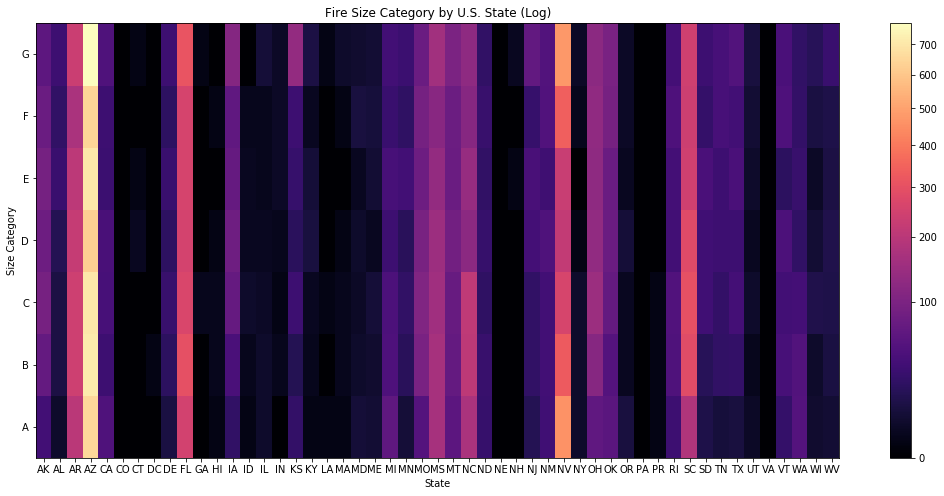

In [93]:
gamma = 0.5
fig, ax = plt.subplots(figsize=(18,8))


X_train_feat = np.array(X_train['STATE']).reshape(-1,1)
xp = np.logical_not(np.isnan(X_train_feat))
X_train_feat = X_train_feat[xp]
y_train = np.array(y_train).transpose()
h = plt.hist2d(X_train_feat, y_train, bins=[np.arange(1, 53), np.arange(1,9)], norm=mcolors.PowerNorm(gamma))

plt.title("Fire Size Category by U.S. State (Log)")
plt.xlabel("State")
plt.ylabel('Size Category')
plt.xticks(np.arange(1,52) + .5, ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
        'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])
plt.yticks(np.arange(1, 8) + .5, ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

fig.colorbar(h[3], ax=ax)



In [37]:
X_1 = pd.read_pickle('final_dataset_1.pkl')
y_1 = X_1['FIRE_SIZE_CLASS']
X_1 = X_1.drop(columns=['FIRE_SIZE_CLASS'])


In [38]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size = .2, random_state = 20);


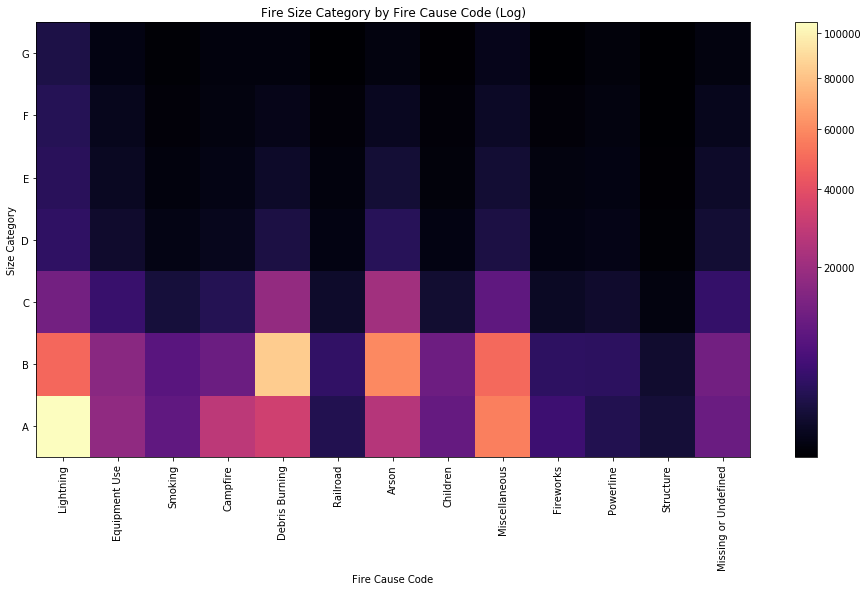

In [76]:
#Cause dict based off of the two columns for cause and cause desc:
#state_cause_dict = {9.0: 'Miscellaneous',
# 1.0: 'Lightning',
# 5.0: 'Debris Burning',
# 4.0: 'Campfire',
# 2.0: 'Equipment Use',
# 7.0: 'Arson',
# 8.0: 'Children',
# 6.0: 'Railroad',
# 3.0: 'Smoking',
# 11.0: 'Powerline',
# 12.0: 'Structure',
# 10.0: 'Fireworks',
# 13.0: 'Missing/Undefined'}
fig, ax = plt.subplots(figsize=(16,8))
plt.set_cmap('magma')
import matplotlib.colors as mcolors
gamma = 0.5
X1_train_feat = np.array(X1_train['STAT_CAUSE_CODE'])
h = plt.hist2d(X1_train_feat, y1_train, norm=mcolors.PowerNorm(gamma), bins=[np.arange(1, 15), np.arange(1,9)])
cause_list = ['Lightning', 'Equipment Use', 'Smoking', 'Campfire', 'Debris Burning',
              'Railroad', 'Arson', 'Children', 'Miscellaneous', 'Fireworks', 'Powerline',
             'Structure', 'Missing or Undefined']

plt.title("Fire Size Category by Fire Cause Code (Log)")
plt.xlabel("Fire Cause Code")
plt.ylabel('Size Category')
plt.xticks(np.arange(1,14) + .5, cause_list, rotation=90);
plt.yticks(np.arange(1, 8) + .5, ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

fig.colorbar(h[3], ax=ax)


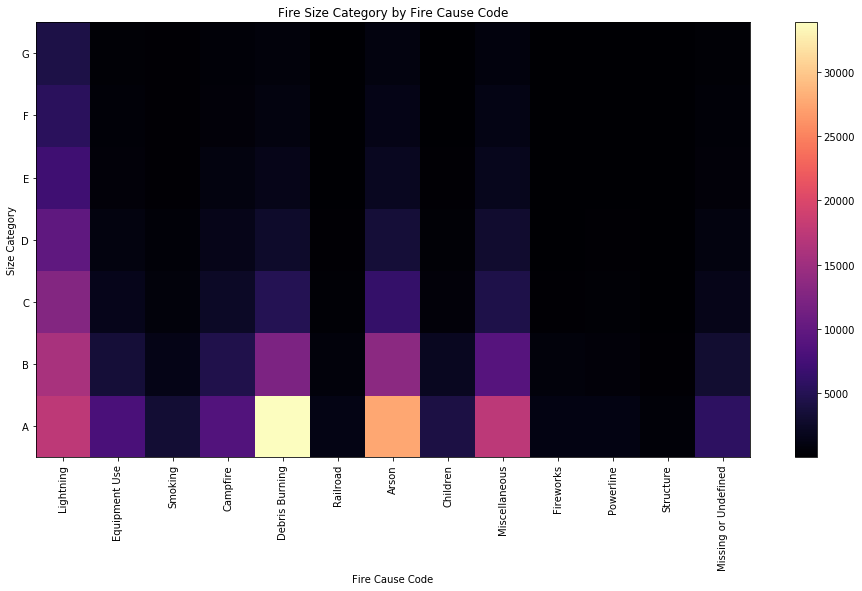

In [17]:
fig, ax = plt.subplots(figsize=(16,8))
plt.set_cmap('magma')
import matplotlib.colors as mcolors

X1_train_feat = np.array(X1_train['STAT_CAUSE_CODE'])
h = plt.hist2d(X1_train_feat, y1_train, bins=[np.arange(1, 15), np.arange(1,9)])
cause_list = ['Lightning', 'Equipment Use', 'Smoking', 'Campfire', 'Debris Burning',
              'Railroad', 'Arson', 'Children', 'Miscellaneous', 'Fireworks', 'Powerline',
             'Structure', 'Missing or Undefined']

plt.title("Fire Size Category by Fire Cause Code")
plt.xlabel("Fire Cause Code")
plt.ylabel('Size Category')
plt.xticks(np.arange(1,14) + .5, cause_list, rotation=90);
plt.yticks(np.arange(1, 8) + .5, ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

fig.colorbar(h[3], ax=ax)

In [58]:
import seaborn as sns

ValueError: Could not interpret input 'size'